# ECON 423 Assignment 1

Diana Tsai  
20567329

## 3. Empirical Data Exercise

### Part 1

In [4]:
import pandas as pd

In [5]:
# Import .csv files
# Coke
coke = pd.read_csv("C:/Users/Diana/Documents/University of Waterloo/" + \
                   "4th Year/ECON 423/COKE.csv")
# Campbell
campb = pd.read_csv("C:/Users/Diana/Documents/University of Waterloo/" + \
                    "4th Year/ECON 423/CPB.csv")
# McDonald's
mcd = pd.read_csv("C:/Users/Diana/Documents/University of Waterloo/" + \
                  "4th Year/ECON 423/MCD.csv")
# Papa John's
papaj = pd.read_csv("C:/Users/Diana/Documents/University of Waterloo/" + \
                    "4th Year/ECON 423/PZZA.csv")
# Starbucks
starb = pd.read_csv("C:/Users/Diana/Documents/University of Waterloo/" + \
                    "4th Year/ECON 423/SBUX.csv")

### Part 2: Adjusted Close

In [6]:
# Importing necessary packages
import numpy as np

import statsmodels.api as sm
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import scipy.stats as ss
import pylab as pl

In [16]:
def adj_close(df,histitle,title,titlelist): 
    # histogram
    df.hist(column="Adj Close", bins=20)
    pl.title(histitle)
    # ACF plot
    data_acfplot = tsa.plot_acf(x=df["Adj Close"], ax=None, lags=None, 
                   alpha=.05, use_vlines=True, unbiased=False,
                   fft=False, title=title, zero=True, vlines_kwargs=None)
    mean_data=np.mean(df["Adj Close"])
    var_data=np.var(df["Adj Close"])
    skew_data=df["Adj Close"].skew(skipna=True)
    kurtosis_data=ss.kurtosis(df["Adj Close"])
    print(titlelist)
    print("Mean: " + str(mean_data))
    print("Variance: " + str(var_data))
    print("Skewness(scipy): " + str(skew_data))
    print("Kurtosis: " + str(kurtosis_data))
    print("")

            Date        Open        High         Low       Close   Adj Close  \
0     2000-01-03   47.781200   48.750000   46.875000   48.375000   35.459312   
1     2000-01-04   48.375000   49.750000   47.625000   49.343700   36.169392   
2     2000-01-05   49.468700   51.000000   48.500000   51.000000   37.383469   
3     2000-01-06   49.375000   51.250000   49.250000   50.062500   36.696259   
4     2000-01-07   50.500000   51.000000   49.812500   50.000000   36.650444   
5     2000-01-10   50.875000   51.250000   50.000000   50.875000   37.291817   
6     2000-01-11   50.687500   51.062500   50.000000   50.375000   36.925331   
7     2000-01-12   50.937500   51.062500   50.000000   50.000000   36.650444   
8     2000-01-13   50.125000   52.000000   50.062500   52.000000   38.116463   
9     2000-01-14   52.125000   52.250000   50.500000   50.500000   37.016949   
10    2000-01-18   51.250000   51.500000   50.000000   50.000000   36.650444   
11    2000-01-19   50.375000   51.000000

C:\Users\Diana\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Diana\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Diana\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


---Coke Adj Close---
Mean: 67.5199575806097
Variance: 2381.5942619866514
Skewness(scipy): 1.9544555849378524
Kurtosis: 2.722020896823624

---Campbell Adj Close---
Mean: 28.73041573343634
Variance: 142.7586956089512
Skewness(scipy): 1.033373878253371
Kurtosis: 0.16635740537401755

---McDonald Adj Close---
Mean: 53.56727077937287
Variance: 1404.4183369192015
Skewness(scipy): 0.8958652477090159
Kurtosis: 0.10534489832549943



C:\Users\Diana\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Diana\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


---Papa John's Adj Close---
Mean: 23.208695257508822
Variance: 496.9661147728834
Skewness(scipy): 1.3744735078668804
Kurtosis: 0.5206377935986657

---Starbucks Adj Close---
Mean: 19.46013260401944
Variance: 307.99644844779834
Skewness(scipy): 1.1040955123682448
Kurtosis: -0.20245509392033645



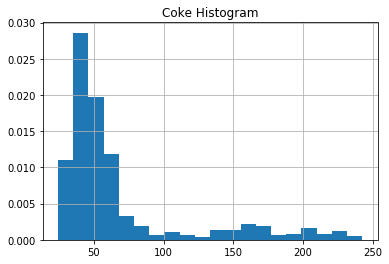

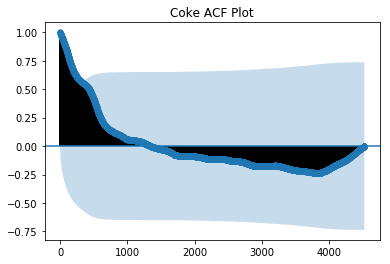

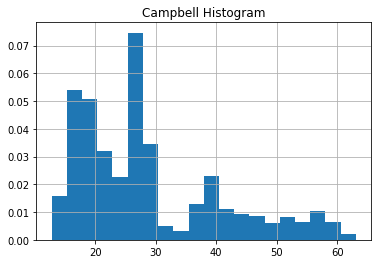

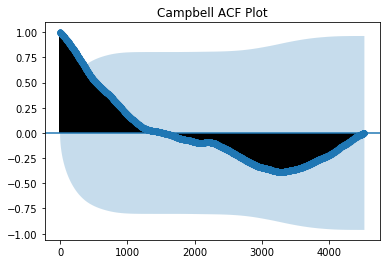

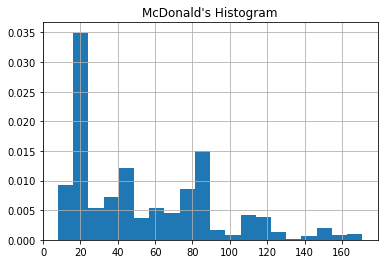

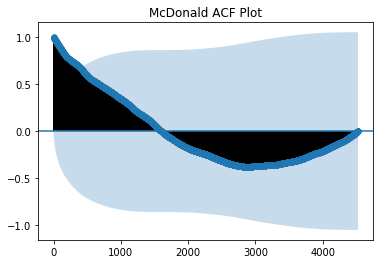

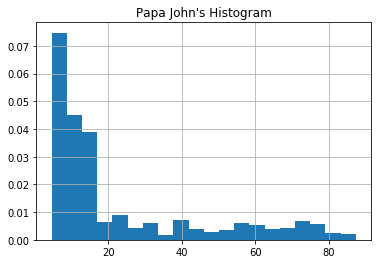

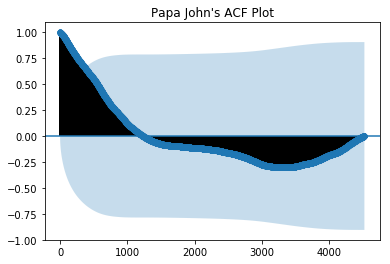

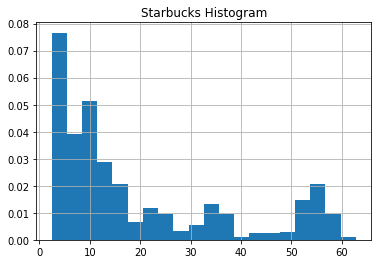

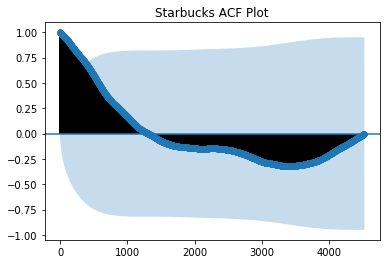

In [14]:
adj_close(coke,"Coke Histogram","Coke ACF Plot","---Coke Adj Close---")
adj_close(campb,"Campbell Histogram","Campbell ACF Plot",
          "---Campbell Adj Close---")
adj_close(mcd,"McDonald's Histogram","McDonald ACF Plot",
          "---McDonald Adj Close---")
adj_close(papaj,"Papa John's Histogram","Papa John's ACF Plot",
          "---Papa John's Adj Close---")
adj_close(starb,"Starbucks Histogram","Starbucks ACF Plot",
          "---Starbucks Adj Close---")

### Part 3: Returns

In [125]:
def returns(df,title,title2,histitle,result):
    df["Return"] = 100*(np.log(df["Adj Close"]) - \
                        np.log(df["Adj Close"].shift(1)))
    df.hist(column="Return", density=True, bins=20)
    pl.title(histitle)
    data_acfplot = tsa.plot_acf(x=df["Return"][1:], ax=None, lags=None,
                                alpha=.05, use_vlines=True, unbiased=False,
                 fft=False, title=title2, zero=False, vlines_kwargs=None)
    mean_df=np.mean(df["Return"])
    var_df=np.var(df["Return"])
    skew_df=df["Return"].skew(skipna=True)
    kurtosis_df=df["Return"].kurtosis(skipna=True)
    print(title)
    print("Mean: " + str(mean_df))
    print("Variance: " + str(var_df))
    print("Skewness: " + str(skew_df))
    print("Kurtosis: " + str(kurtosis_df))
    print(result)
    print("")

---Coke Return---
Mean: 0.03973763966687511
Variance: 3.7324922948305628
Skewness: -0.09076176829751827
Kurtosis: 7.183789541940349
This is not a normal distribution because the kurtosis is a thick tail and it is left skewed.

---Campbell Return---
Mean: 0.016636952571090227
Variance: 1.9583435546331096
Skewness: 0.15603910118317357
Kurtosis: 8.476146283170696
This is not a normal distribution because the kurtosis is a thick tail and it is right skewed.

---McDonald's Return---
Mean: 0.04247109890951398
Variance: 2.136912994292033
Skewness: -0.1646954294763829
Kurtosis: 6.802009640302656
This is not a normal distribution because the kurtosis is a thick tail and it is left skewed.

---Papa John's Return---
Mean: 0.04828396651004327
Variance: 4.6676796085771555
Skewness: -0.1619869415776473
Kurtosis: 8.262604589115881
This is not a normal distribution because the kurtosis is a thick tail and it is left skewed.

---Starbuck Return---
Mean: 0.06886823714900205
Variance: 4.674954932574021
S

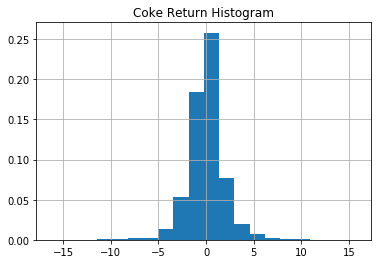

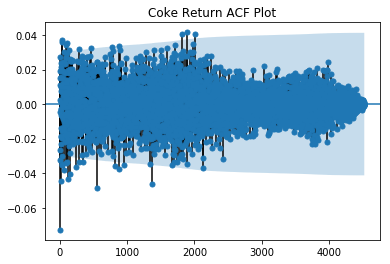

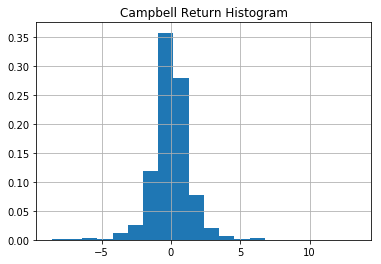

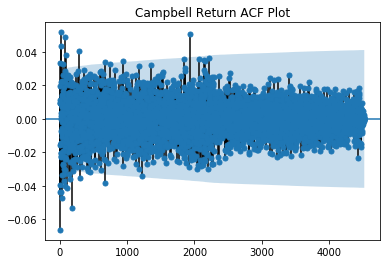

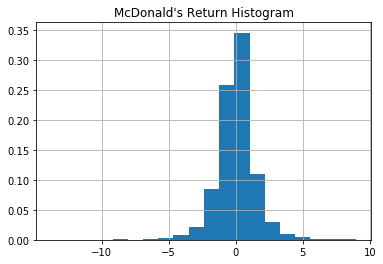

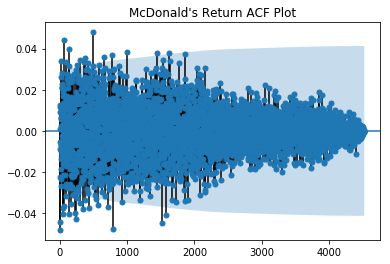

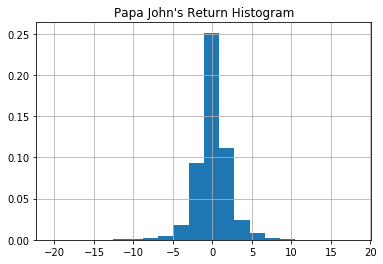

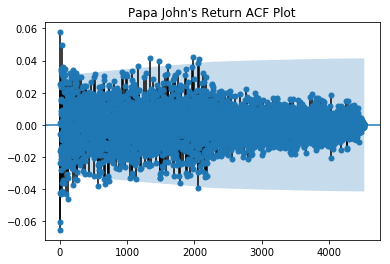

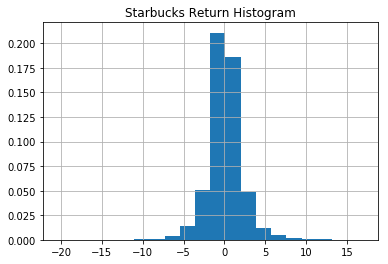

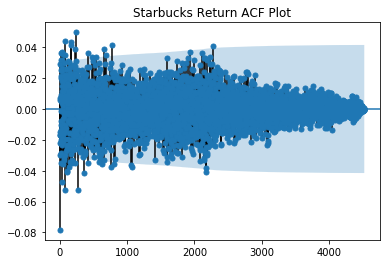

In [218]:
returns(coke,"---Coke Return---","Coke Return ACF Plot",
        "Coke Return Histogram",
"This is not a normal distribution because the kurtosis is a thick tail and it is left skewed.")
returns(campb,"---Campbell Return---","Campbell Return ACF Plot",
        "Campbell Return Histogram",
"This is not a normal distribution because the kurtosis is a thick tail and it is right skewed.")
returns(mcd,"---McDonald's Return---","McDonald's Return ACF Plot",
        "McDonald's Return Histogram", 
"This is not a normal distribution because the kurtosis is a thick tail and it is left skewed.")
returns(papaj,"---Papa John's Return---","Papa John's Return ACF Plot",
        "Papa John's Return Histogram",
"This is not a normal distribution because the kurtosis is a thick tail and it is left skewed.")
returns(starb,"---Starbuck Return---","Starbucks Return ACF Plot",
        "Starbucks Return Histogram", 
"This is not a normal distribution because the kurtosis is a thick tail and it is right skewed.")

### Part 4: Returns Squared

In [8]:
def returnsquared(df,title,title2,histitle):
    df["Return Squared"]=df["Return"]**2
    df.hist(column="Return Squared", density=True, bins=20)
    pl.title(histitle)
    data_acfplot = tsa.plot_acf(x=df["Return Squared"][1:], ax=None, lags=None,
                                alpha=.05, use_vlines=True, unbiased=False,
                 fft=False, title=title2, zero=False, vlines_kwargs=None)
    mean_df=np.mean(df["Return Squared"])
    var_df=np.var(df["Return Squared"])
    skew_df=df["Return Squared"].skew(skipna=True)
    kurtosis_df=df["Return Squared"].kurtosis(skipna=True)
    print(title)
    print("Mean: " + str(mean_df))
    print("Variance: " + str(var_df))
    print("Skewness: " + str(skew_df))
    print("Kurtosis: " + str(kurtosis_df))
    print("")

---Coke Return Squared---
Mean: 3.7340713748368484
Variance: 127.7345671697594
Skewness: 11.267412331501788
Kurtosis: 194.49590823968623

---Campbell Return Squared---
Mean: 1.9586203428239597
Variance: 40.16681023785738
Skewness: 11.630540217599691
Kurtosis: 214.0075726942499

---McDonald's Return Squared---
Mean: 2.138716788534615
Variance: 40.08117178403049
Skewness: 11.452679136160695
Kurtosis: 225.34175473003341

---Papa John's Return Squared---
Mean: 4.6700109499991
Variance: 223.0942555461708
Skewness: 12.542000675711662
Kurtosis: 244.922073510561

---Starbuck Return Squared---
Mean: 4.679697766662013
Variance: 200.4120231508489
Skewness: 11.327383962134169
Kurtosis: 221.39120949461477



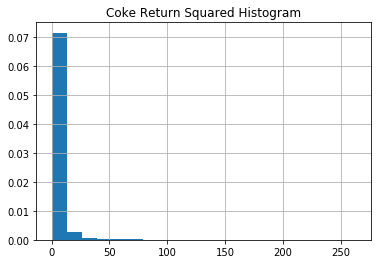

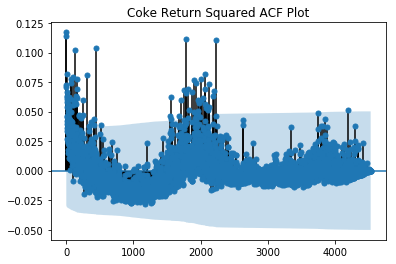

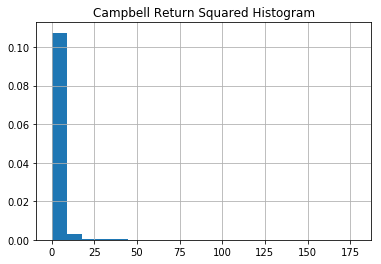

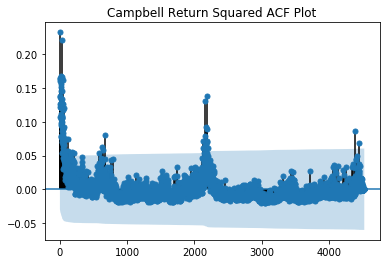

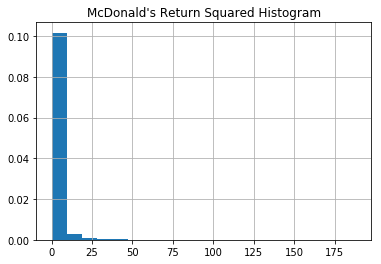

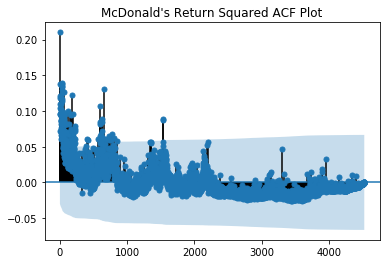

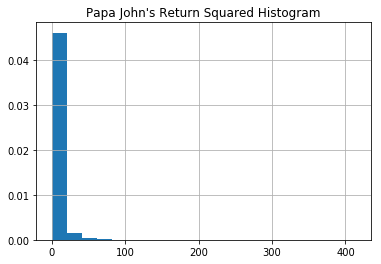

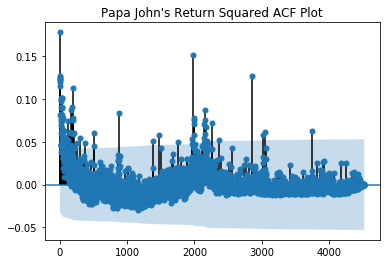

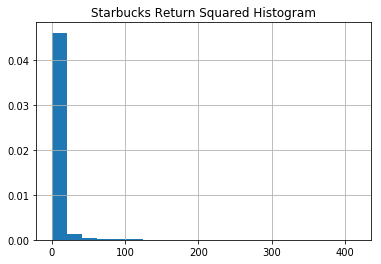

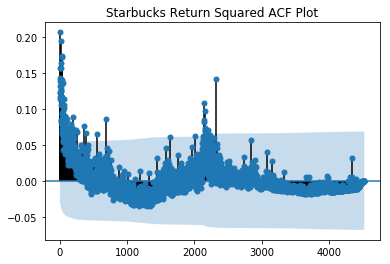

In [219]:
returnsquared(coke,"---Coke Return Squared---",
    "Coke Return Squared ACF Plot","Coke Return Squared Histogram")
returnsquared(campb,"---Campbell Return Squared---",
    "Campbell Return Squared ACF Plot","Campbell Return Squared Histogram")
returnsquared(mcd,"---McDonald's Return Squared---",
    "McDonald's Return Squared ACF Plot","McDonald's Return Squared Histogram")
returnsquared(papaj,"---Papa John's Return Squared---",
    "Papa John's Return Squared ACF Plot","Papa John's Return Squared Histogram")
returnsquared(starb,"---Starbuck Return Squared---",
    "Starbucks Return Squared ACF Plot","Starbucks Return Squared Histogram")

### Part 5: Correlation

In [22]:
print("Coke: %.2f" % coke["Return"].corr(coke["Volume"]))
print("Campbell: %.2f" % campb["Return"].corr(campb["Volume"]))
print("McDonald's: %.2f" % mcd["Return"].corr(mcd["Volume"]))
print("Papa John's: %.2f" % papaj["Return"].corr(papaj["Volume"]))
print("Starbucks: %.2f" % starb["Return"].corr(starb["Volume"]))

Coke: 0.01
Campbell: -0.04
McDonald's: -0.03
Papa John's: -0.03
Starbucks: -0.01


### Part 6: Conditional Probabilities

In [199]:
def conditionalprob(df):
    # get increase data
    df["priceinc"] = (df["Return"] > 0)
    df["priceinclag"] = df["priceinc"].shift(1)
    df["priceinc_priceinclag"] = ((df["priceinc"]==1) & (df["priceinclag"]==1))

    # get decrease data
    df["pricedec_pricedeclag"] = ((df["priceinc"]==0) & (df["priceinclag"]==0))

    # get prob(incr | incr) and prob(decr | incr)
    prob_incr_incrlag = df["priceinc_priceinclag"].mean()
    print("Prob(incr | incr) = %.2f" % (prob_incr_incrlag))
    print("Prob(decr | incr) = %.2f" % (1 - prob_incr_incrlag))

    # get prob(decr | decr) and prob(incr | decr)
    prob_decr_decrlag = df["pricedec_pricedeclag"].mean()
    print("Prob(decr | decr) = %.2f" % (prob_decr_decrlag))
    print("Prob(incr | decr) = %.2f" % (1 - prob_decr_decrlag))

In [200]:
print("---Coke Price Conditional Probability---")
print(conditionalprob(coke))
print("")
print("---Campbell Price Conditional Probability---")
print(conditionalprob(campb))
print("")
print("---McDonald's Price Conditional Probability---")
print(conditionalprob(mcd))
print("")
print("---Papa John's Price Conditional Probability---")
print(conditionalprob(papaj))
print("")
print("---Starbucks Price Conditional Probability---")
print(conditionalprob(starb))
print("")

---Coke Price Conditional Probability---
Prob(incr | incr) = 0.24
Prob(decr | incr) = 0.76
Prob(decr | decr) = 0.23
Prob(incr | decr) = 0.77
None

---Campbell Price Conditional Probability---
Prob(incr | incr) = 0.24
Prob(decr | incr) = 0.76
Prob(decr | decr) = 0.23
Prob(incr | decr) = 0.77
None

---McDonald's Price Conditional Probability---
Prob(incr | incr) = 0.27
Prob(decr | incr) = 0.73
Prob(decr | decr) = 0.22
Prob(incr | decr) = 0.78
None

---Papa John's Price Conditional Probability---
Prob(incr | incr) = 0.24
Prob(decr | incr) = 0.76
Prob(decr | decr) = 0.23
Prob(incr | decr) = 0.77
None

---Starbucks Price Conditional Probability---
Prob(incr | incr) = 0.24
Prob(decr | incr) = 0.76
Prob(decr | decr) = 0.24
Prob(incr | decr) = 0.76
None



### Part 7

In [201]:
def conditionalprobvol(df):
    df["volumeinc"] = (df["Volume"] - df["Volume"].shift(1) > 0)
    df["priceinc"] = (df["Return"] > 0)
    df["volumeinclag"] = df["volumeinc"].shift(1)
    df["priceinc_volumeinclag"] = ((df["priceinc"]==1) & (df["volumeinclag"]==1))

    # get decrease data
    df["pricedec_volumedeclag"] = ((df["priceinc"]==0) & (df["volumeinclag"]==0))

    # get prob(incr | incr) and prob(decr | incr)
    prob_incr_incrvollag = df["priceinc_volumeinclag"].mean()
    print("Prob(incr | incr) = %.2f" % (prob_incr_incrvollag))
    print("Prob(decr | incr) = %.2f" % (1 - prob_incr_incrvollag))

    # get prob(decr | decr) and prob(incr | decr)
    prob_decr_decrvollag = df["pricedec_volumedeclag"].mean()
    print("Prob(decr | decr) = %.2f" % (prob_decr_decrvollag))
    print("Prob(incr | decr) = %.2f" % (1 - prob_decr_decrvollag))

In [202]:
print("---Coke Price/Volume Conditional Probability---")
print(conditionalprobvol(coke))
print("")
print("---Campbell Price/Volume Conditional Probability---")
print(conditionalprobvol(campb))
print("")
print("---McDonald's Price/Volume Conditional Probability---")
print(conditionalprobvol(mcd))
print("")
print("---Papa John's Price/Volume Conditional Probability---")
print(conditionalprobvol(papaj))
print("")
print("---Starbucks Price/Volume Conditional Probability---")
print(conditionalprobvol(starb))
print("")

---Coke Price/Volume Conditional Probability---
Prob(incr | incr) = 0.25
Prob(decr | incr) = 0.75
Prob(decr | decr) = 0.26
Prob(incr | decr) = 0.74
None

---Campbell Price/Volume Conditional Probability---
Prob(incr | incr) = 0.25
Prob(decr | incr) = 0.75
Prob(decr | decr) = 0.25
Prob(incr | decr) = 0.75
None

---McDonald's Price/Volume Conditional Probability---
Prob(incr | incr) = 0.25
Prob(decr | incr) = 0.75
Prob(decr | decr) = 0.23
Prob(incr | decr) = 0.77
None

---Papa John's Price/Volume Conditional Probability---
Prob(incr | incr) = 0.24
Prob(decr | incr) = 0.76
Prob(decr | decr) = 0.26
Prob(incr | decr) = 0.74
None

---Starbucks Price/Volume Conditional Probability---
Prob(incr | incr) = 0.25
Prob(decr | incr) = 0.75
Prob(decr | decr) = 0.26
Prob(incr | decr) = 0.74
None



## 4. Simulation

### Part 1 and 2

In [254]:
def simulreg(df):
        st = np.random.normal(2, 3, len(df["Return"]))
        st1=pd.DataFrame(pd.Series(st))
        df['random'] = st1
        nan_df=df.dropna()
        modeldf = sm.OLS(nan_df["Return"], nan_df["random"]).fit()
        print(modeldf.summary())
        print("R-Squared: " + str(modeldf.rsquared))

#### Coke

In [255]:
simulreg(coke)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2143
Date:                Thu, 04 Oct 2018   Prob (F-statistic):              0.643
Time:                        04:23:31   Log-Likelihood:                -9405.6
No. Observations:                4527   AIC:                         1.881e+04
Df Residuals:                    4526   BIC:                         1.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
random        -0.0037      0.008     -0.463      0.6

The R-squared is 4.74e^-05 and the p-value for the coefficient is 0.953 hence it is not significant.

#### Campbell

In [256]:
simulreg(campb)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3192
Date:                Thu, 04 Oct 2018   Prob (F-statistic):              0.572
Time:                        04:24:00   Log-Likelihood:                -7945.0
No. Observations:                4527   AIC:                         1.589e+04
Df Residuals:                    4526   BIC:                         1.590e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
random        -0.0032      0.006     -0.565      0.5

The R-squared is 7.05e^-05 and the p-value for the coefficient is 0.833 hence it is not significant.

#### McDonald's

In [257]:
simulreg(mcd)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4849
Date:                Thu, 04 Oct 2018   Prob (F-statistic):              0.486
Time:                        04:24:19   Log-Likelihood:                -8144.0
No. Observations:                4527   AIC:                         1.629e+04
Df Residuals:                    4526   BIC:                         1.630e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
random         0.0042      0.006      0.696      0.4

The R-squared is 0.000107 and the p-value for the coefficient is 0.295 hence it is not significant.

#### Papa John's

In [258]:
simulreg(papaj)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.351
Date:                Thu, 04 Oct 2018   Prob (F-statistic):              0.245
Time:                        04:24:30   Log-Likelihood:                -9911.3
No. Observations:                4527   AIC:                         1.982e+04
Df Residuals:                    4526   BIC:                         1.983e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
random         0.0103      0.009      1.162      0.2

The R-squared is 0.000298 and the p-value for the coefficient is 0.295 hence it is not significant.

#### Starbucks

In [259]:
simulreg(starb)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3740
Date:                Thu, 04 Oct 2018   Prob (F-statistic):              0.541
Time:                        04:24:59   Log-Likelihood:                -9916.5
No. Observations:                4527   AIC:                         1.983e+04
Df Residuals:                    4526   BIC:                         1.984e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
random         0.0054      0.009      0.612      0.5

The R-squared is 8.264e^-05 and the p-value for the coefficient is 0.491 hence it is not significant.

### Part 4

In [260]:
def simulregloop(df, message):
    n_significants = 0
    for i in range(1000):
        st = np.random.normal(2, 3, len(df["Return"]))
        st1=pd.DataFrame(pd.Series(st))
        df['random'] = st1
        nan_df=df.dropna()
        modeldf = sm.OLS(nan_df["Return"], nan_df["random"]).fit()
        if modeldf.pvalues[0] < 0.05:
            n_significants += 1
    print(message)
    print(n_significants)
    print("")

simulregloop(coke,
    "Number of times coefficient is significant out of 1000 loops for Coke")
simulregloop(campb, 
    "Number of times coefficient is significant out of 1000 loops for Campbell")
simulregloop(mcd, 
    "Number of times coefficient is significant out of 1000 loops for McDonald's")
simulregloop(papaj, 
    "Number of times coefficient is significant out of 1000 loops for Papa John's")
simulregloop(starb, 
    "Number of times coefficient is significant out of 1000 loops for Starbuck")

Number of times coefficient is significant out of 1000 loops for Coke
94

Number of times coefficient is significant out of 1000 loops for Campbell
36

Number of times coefficient is significant out of 1000 loops for McDonald's
152

Number of times coefficient is significant out of 1000 loops for Papa John's
82

Number of times coefficient is significant out of 1000 loops for Starbuck
171

